IMPORTING THE REQUIRED LIBRARIES

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOADINDG THE DATASET

In [6]:
dataset=pd.read_csv('dataset/processed_1.csv')
dataset.head()

,Transaction,Date,Time,Items
0,1,2016-10-30,09:58:11,Bread
1,2,2016-10-30,10:05:34,Scandinavian
2,3,2016-10-30,10:07:57,Jam|Hot chocolate|Cookies
3,4,2016-10-30,10:08:41,Muffin
4,5,2016-10-30,10:13:03,Coffee|Pastry|Bread


In [3]:
#LOADING THE DATASET TO GET UNIQUE ITEMS
old_dataset=pd.read_csv(r'dataset/BreadBasket_DMS.csv')
#old_dataset=dataset.mask(old_dataset.eq('NONE')).dropna()
old_dataset = old_dataset[old_dataset.Item != 'NONE']
unique_set_items=set(old_dataset.Item)
print(len(unique_set_items))

94


[370, 590, 856, 8, 6, 107, 77, 159, 172, 38, 21, 54, 14, 13, 99, 146, 2, 10, 5, 5, 1435, 48, 616, 185, 1, 771, 17, 63, 3, 9, 11, 81, 318, 18, 44, 11, 12, 3, 7, 193, 47, 125, 2, 123, 7, 369, 3, 6, 4, 13, 327, 2, 152, 374, 1, 10, 12, 8, 1025, 16, 369, 6, 149, 28, 38, 342, 5, 54, 1, 1, 1, 2, 540, 58, 3, 277, 7, 379, 7, 2, 3325, 1, 28, 1, 1, 6, 6, 136, 2, 8, 11, 6, 5471, 12]


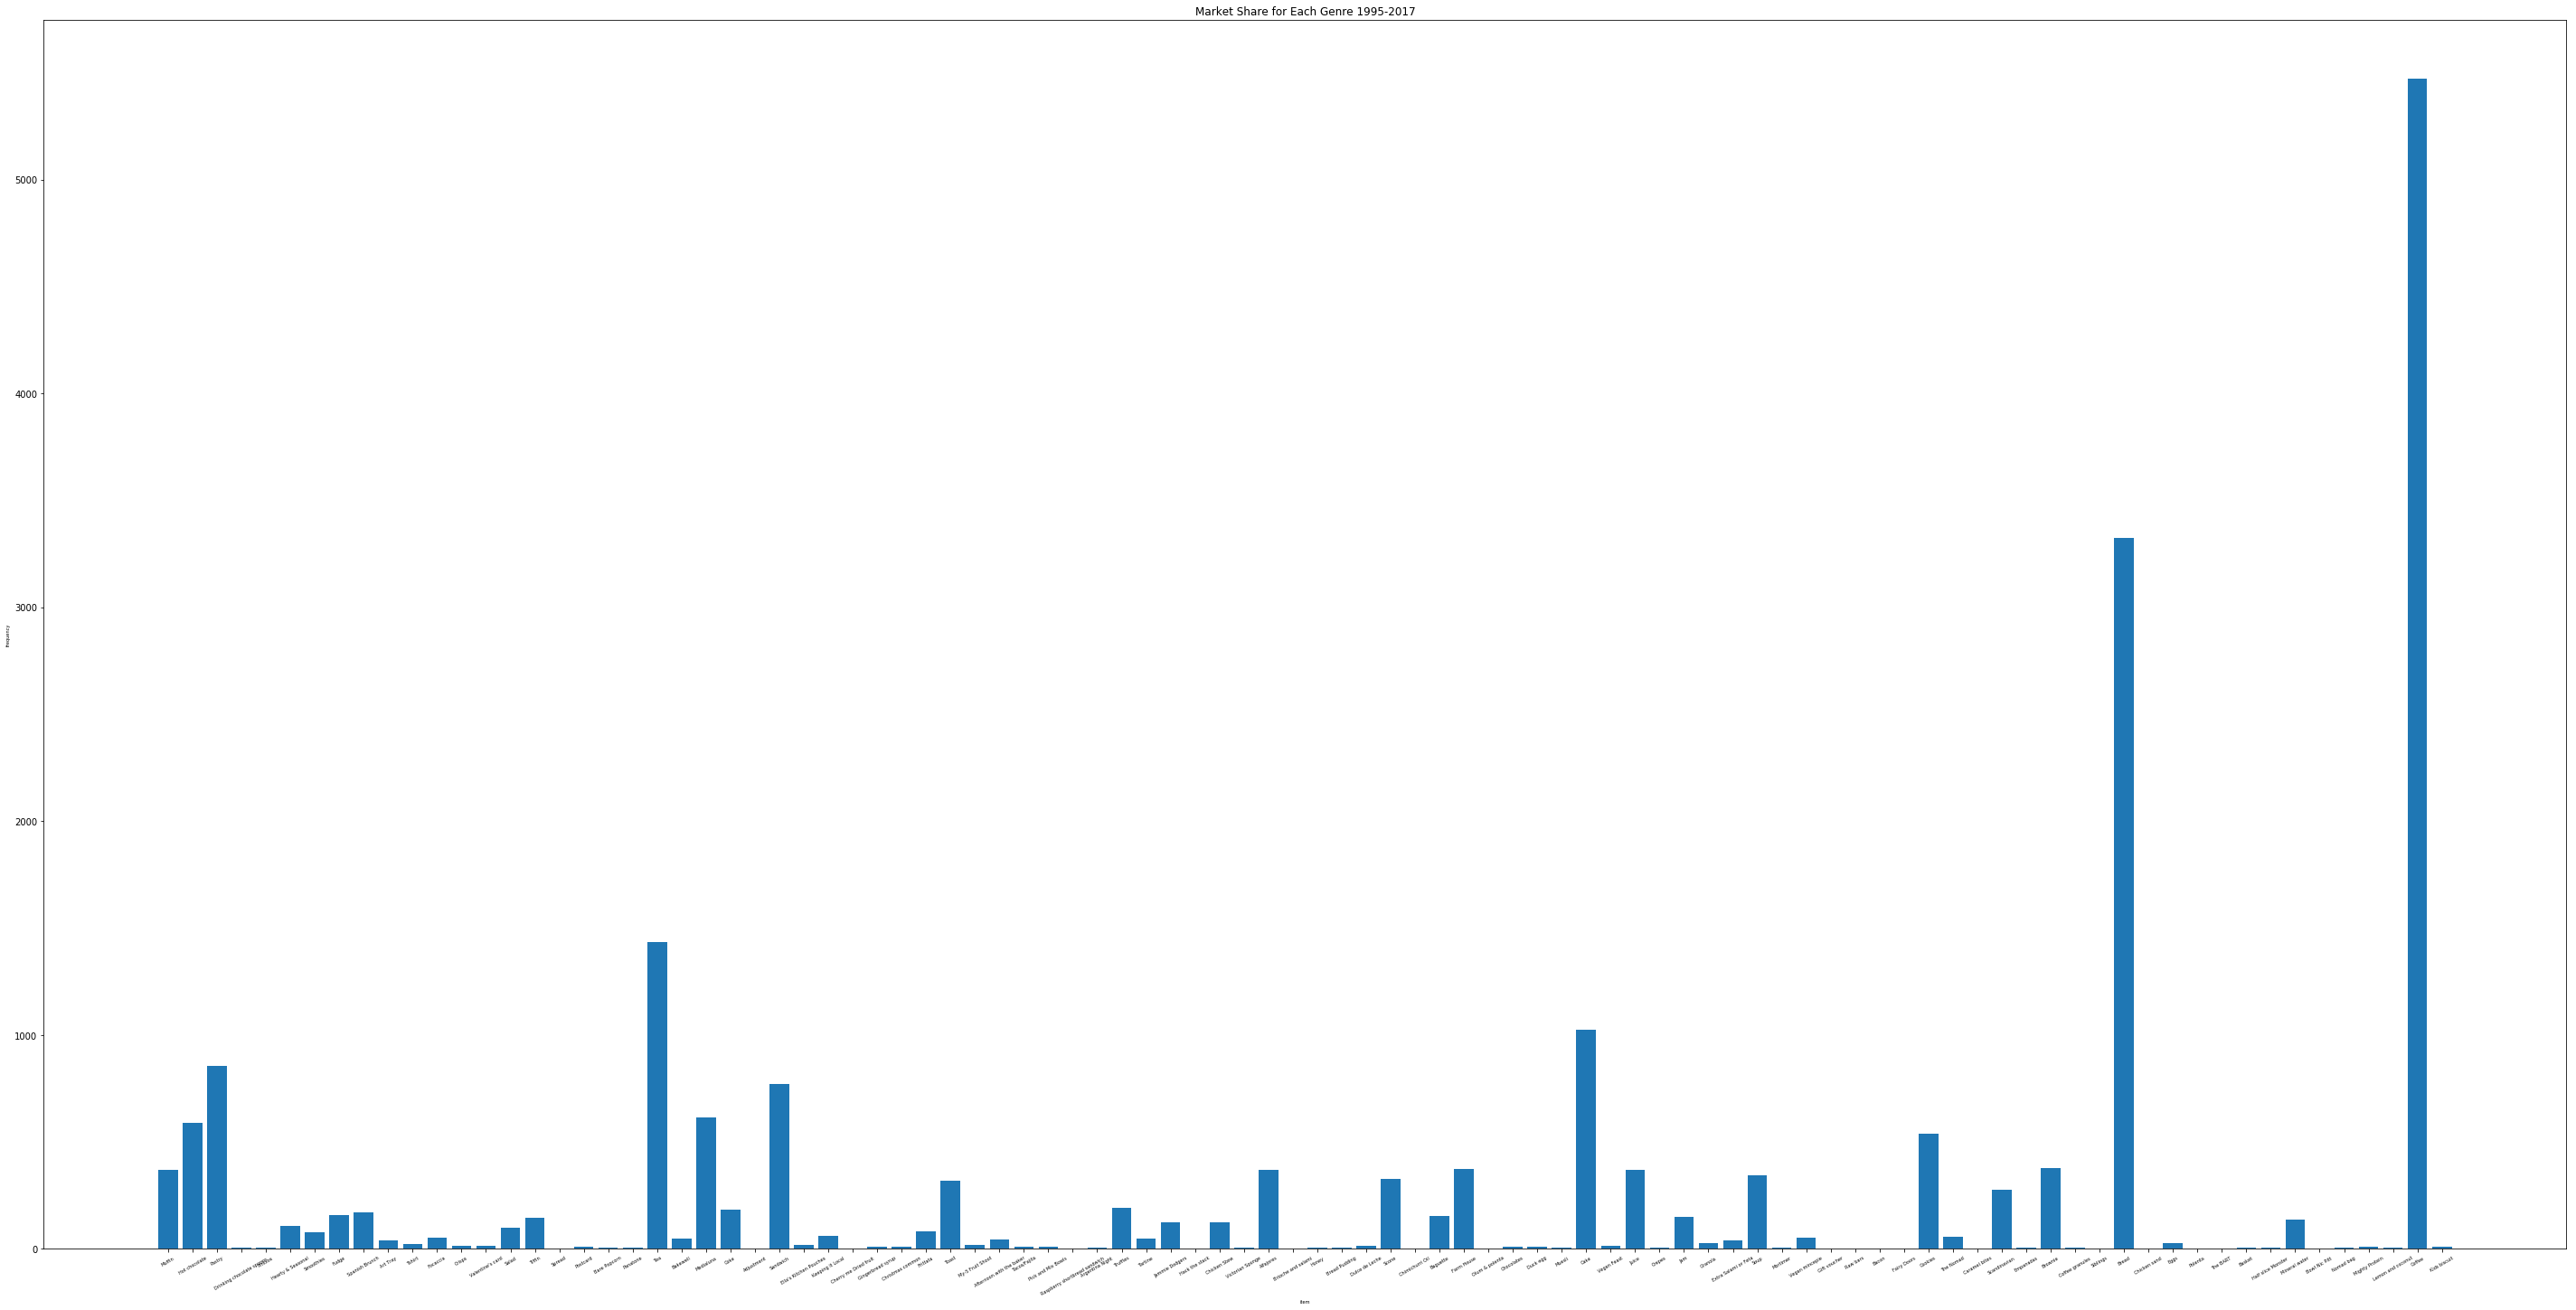

In [24]:
#FINDING THE MOST FREQUENT USED PRODUCT
items_index=list(unique_set_items)
item_freq=[0]*len(items_index)
for ele in items_index:
    item_freq[items_index.index(ele)]=len(old_dataset[old_dataset.Item==ele])
print(item_freq)
plt.figure(figsize=(50,25))
plt.bar(items_index,item_freq)
plt.xlabel('item', fontsize=5)
plt.ylabel('frequency', fontsize=5)
plt.xticks(list(range(0,len(items_index))),items_index, fontsize=5, rotation=30)
plt.title('Market Share for Each Genre 1995-2017')
plt.show()


In [26]:
top_2_idx = np.argsort(item_freq)[-5:]
top_5_items = [items_index[i] for i in top_2_idx]
top_5_items_count=[item_freq[i] for i in top_2_idx]
print(top_5_items)
print(top_5_items_count)

['Pastry', 'Cake', 'Tea', 'Bread', 'Coffee']
[856, 1025, 1435, 3325, 5471]


CONVERTING THE TRASACTIONS INTO VECTORS

In [10]:

item_vec_dataset=list()
#print(len(dataset.Items))
for i in range(len(dataset.Items)):
    itm=dataset.Items[i].split("|")
    item_vec=[0]*94
    #setting the position to  1 indicating that item belongs to the current transaction
    for ele in itm:
        item_vec[items_index.index(ele)]=1
    item_vec_dataset.append(item_vec)

    

In [89]:
#importing the required libraries
from sklearn.cluster import KMeans
from scipy import spatial
kmeans=KMeans(n_clusters=10,random_state=1).fit(item_vec_dataset)

In [90]:
#labeling each transaction to the cluster it belongs to.
cluster_map=pd.DataFrame()
cluster_map["trans_vec"]=item_vec_dataset
cluster_map["cluster"]=kmeans.labels_

In [95]:
#RECOMMENDING PRODUCTS TO THE USER BASED ON THE CLUSTER THAT 
#THE GIVEN TRANSACTION BELONGS TO AND ITEMS THAT ARE PRESENT IN THE CLUSTER

#RECOMMENDING PRODUCTS BASED ON THE BELOW GIVEN TRANSACTION.
#new transaction "coffee,bread,soup"
new_trans=[0]*len(items_index)
new_trans[items_index.index("Coffee")]=1
new_trans[items_index.index("Bread")]=1
new_trans[items_index.index("Soup")]=1

def predict_next_items(current_bucket):
    #GETTING THE CLUSTER TO WHICH THE CURRENT CLUSTER BELONGS TO
    next_item=kmeans.predict([current_bucket])
    print(next_item)
    #GETTING ALL THE TRANSACTION THAT BELONGS TO THIS CLUSTER
    similar_trans=cluster_map[cluster_map.cluster==next_item[0]].trans_vec
    similar_vec=list()
    #GETTING THE COSINE SIMILARITY BETTWEN THE TRANSACTIONS PRESENT IN THE CURRENT CLUSTER USING COSINE SIMILARITY.
    for ele in similar_trans:
        result=1-spatial.distance.cosine(new_trans,ele)
        #IF THE COSINE SIMILARITY IS GREATER THAN 0.70 WE INCLUDE THE ITEMS THAT ARE THER IN THAT TRANSACTION TO BE THE MOST 
        #PROBABLE ITEM THAT COULD BE BOUGHT BY THE USER.
        if(result>0.70 ):
            #print(result)
            similar_vec.append(ele)

    #print(similar_vec)
    current_item=list()
    #GETTING THE ITEMS THAT ARE PRESET IN THE CURRENT TRANSACTION
    for i in range(len(current_bucket)):
        if(current_bucket[i]==1):
            current_item.append(items_index[i])
    
    recommended_items=list()
    #RECOMMENDING THE PRODUCTS TO THE USERR BASED ON THE CURRENT TRANSACTION AND SIMILAR TRANSACTIONS
    for ele in similar_vec:
        #GETTING ALL THE  ITEMS THAT ARE PRESENT IN THE SIMILAR TRANSACTIONS.
        for i in range(len(ele)):
            if(ele[i]==1 and (items_index[i] not in current_item)):
                recommended_items.append(items_index[i])
    print(len(set(recommended_items)))
    print(set(recommended_items))
    
predict_next_items(new_trans)

[7]
12
{'Muffin', 'Scandinavian', 'Spanish Brunch', 'Brownie', 'Chicken Stew', 'Farm House', 'Coke', 'Cake', 'Sandwich', 'Hearty & Seasonal', 'Tea', 'Mineral water'}
